In [8]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [1]:
import graphviz
from IPython.display import Image

In [2]:
def create_plural_fst():
  # Create a directed graph using Graphviz
  fst = graphviz.Digraph('FST', format='png')

  # Define attributes for the graph, nodes, and edges
  fst.attr('node', shape='circle')

  # Add states to the FST
  fst.node('0', 'Nominal Root', shape='ellipse')
  fst.node('1', 'Last Vowel is [e, i, ö, ü]', shape='ellipse')
  fst.node('2', 'Last Vowel is [a, ı, o, u]', shape='ellipse')
  fst.node('3', '+ler', shape='doublecircle')
  fst.node('4', '+lar', shape='doublecircle')
  fst.node('5', 'END', shape='doublecircle')

  # Add transitions to the FST
  fst.edge('0', '1', label='Front Vowel\n(e, i, ö, ü)')
  fst.edge('0', '2', label='Back Vowel\n(a, ı, o, u)')
  fst.edge('1', '3', label='Transition to "ler"')
  fst.edge('2', '4', label='Transition to "lar"')
  fst.edge('3', '5', label='[EOS]')
  fst.edge('4', '5', label='[EOS]')

  return fst

In [3]:
# Function to create a basic FST for possessive suffix in Turkish
def create_possessive_fst():
    g = graphviz.Digraph('FST')

     # Define states
    g.node('0', 'Nominal Root', shape='ellipse')
    g.node('V', 'Ends with Vowel', shape='ellipse')
    g.node('C', 'Ends with Consonant', shape='ellipse')
    g.node('S', 'Softening Applied', shape='ellipse')  # State for consonant softening
    g.node('1', 'Front Vowel Harmony', shape='ellipse')
    g.node('2', 'Back Vowel Harmony', shape='ellipse')
    g.node('3', '+Hm', shape='doublecircle')
    g.node('4', '+Hn', shape='doublecircle')
    g.node('5', '+H/sH', shape='doublecircle')
    g.node('6', '+mHz', shape='doublecircle')
    g.node('7', '+nHz', shape='doublecircle')
    g.node('8', '+lArH', shape='doublecircle')
    g.node('9', 'END', shape='doublecircle')

    # Define transitions
    g.edge('0', 'V', label='Ends in Vowel')
    g.edge('0', 'C', label='Ends in Consonant')
    g.edge('C', 'S', label='Softening (k->ğ, p->b, ç->c, t->d)')
    g.edge('S', '1', label='Front Vowel\n(e, i, ö, ü)')
    g.edge('S', '2', label='Back Vowel\n(a, ı, o, u)')
    g.edge('V', '1', label='Front Vowel\n(e, i, ö, ü)')
    g.edge('V', '2', label='Back Vowel\n(a, ı, o, u)')
    g.edge('1', '3', label='Hm')
    g.edge('2', '3', label='Hm')
    g.edge('1', '4', label='Hn')
    g.edge('2', '4', label='Hn')
    g.edge('1', '5', label='sH')
    g.edge('2', '5', label='H')
    g.edge('1', '6', label='mHz')
    g.edge('2', '6', label='HmHz')
    g.edge('1', '7', label='nHz')
    g.edge('2', '7', label='HnHz')
    g.edge('1', '8', label='lArH')
    g.edge('2', '8', label='lArH')
    g.edge('3', '9', label='[EOS]')
    g.edge('4', '9', label='[EOS]')
    g.edge('5', '9', label='[EOS]')
    g.edge('6', '9', label='[EOS]')
    g.edge('7', '9', label='[EOS]')
    g.edge('8', '9', label='[EOS]')

    return g

In [4]:
# Create and display the FSTs
plural_fst = create_plural_fst()
possessive_fst = create_possessive_fst()

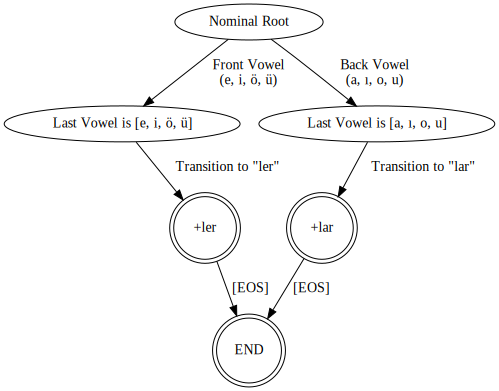

In [5]:
# Display FST of the plural suffix rule
graphviz.Source(plural_fst.source)

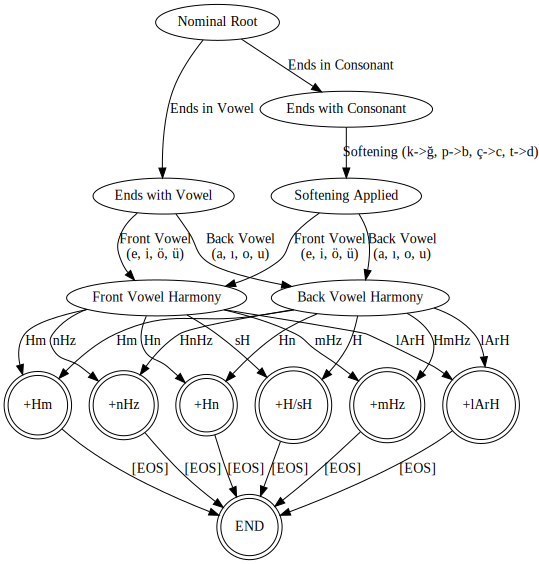

In [84]:
# Display FST of the possessive suffix rule
graphviz.Source(possessive_fst.source)